# Report
* 2-1. 주간 음원 변동 특이사항
    * {start_date}_{end_date}_total_outlier.xlsx
* 3-1-1. 순위 급상승 음원
    * {start_date}_{end_date}_total_outlier.xlsx
    * {start_date}_{end_date}_total_outlier.png
* 4-1-1. 기획사별 음원차트 진입 요약
    * {start_date}_{end_date}_agency_in_chart.xlsx
* 4-1-2. 기획사 소셜미디어 관심도 요약
    * naver_datalab/소속사_소셜관심도.png
    * kakao_trend/소속사_소셜관심도.png
* 4-2-1. 소속사별 진입 음원
    * {start_date}_{end_date}_mean_outlier_agency.xlsx
* 6-1-1. 음원사이트별 주간 순위
    * {날짜}_Top100_ranks.xlsx
* 6-1-2. 음원사이트별 주간 그래프
    * {site_name}/[{site_name}]{start_date}_{end_date}_그래프.png

## 필요 라이브러리 로드

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math
import shutil

In [96]:
from selenium import webdriver
import chromedriver_autoinstaller as ca
import random, time

In [97]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [98]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.
matplotlib.rcParams['figure.max_open_warning'] = 0 # 많은 그래프 생성시 오류 메세지 숨기기.

In [99]:
import seaborn as sns

## 이번주 날짜 설정

In [100]:
# 전주 설정
past_start_date = '2022-05-09'
past_end_date = '2022-05-15'
# 기간 설정(이번주)
start_date = '2022-05-16'
end_date = '2022-05-22'

In [101]:
# 작업 위치 고정
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [102]:
# 현재 코드 위치
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

## 6-1-1. 음원사이트별 주간 순위

In [103]:
# 기준 날짜 생성
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-05-16
1,2022-05-17
2,2022-05-18
3,2022-05-19
4,2022-05-20
5,2022-05-21
6,2022-05-22


In [104]:
for one in basic_date_df['날짜']:
    print(type(one), one)

<class 'str'> 2022-05-16
<class 'str'> 2022-05-17
<class 'str'> 2022-05-18
<class 'str'> 2022-05-19
<class 'str'> 2022-05-20
<class 'str'> 2022-05-21
<class 'str'> 2022-05-22


In [105]:
one_date = '2022-05-16'
one_day_list = [one_date for i in range(100)]
one_day_list[:5]

['2022-05-16', '2022-05-16', '2022-05-16', '2022-05-16', '2022-05-16']

In [106]:
# 음원 사이트
site_list = ['bugs', 'flo', 'genie', 'melon', 'vibe']
total_outlier_df = pd.DataFrame()

# 기준 날짜 생성
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')

for one_date in basic_date_df['날짜']:
    mod_one_date = one_date.replace('-', '')
    one_day_list = [one_date for i in range(100)]
    one_day_rank = [i for i in range(1, 101)]
    one_day_df = pd.DataFrame({'날짜':one_day_list, '순위':one_day_rank})
    for site_name in site_list:
        # code_path = 'c:/data/Wantreez/Crawling/music'
        live_folder = f'crawled_data/mod_{site_name}'
        live_path = os.path.join(code_path, live_folder)
        file_list = os.listdir(live_path)
            
        # 모든 파일 합치기
        for one_file in file_list:
            if mod_one_date in one_file:
                one_path = os.path.join(live_path, one_file)
                temp = pd.read_excel(one_path)
                one_day_df[f'{site_name}'] = temp['곡']
    
    # 파일 저장
    report_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
    os.makedirs(report_folder, exist_ok=True)
    ranks_save_folder = os.path.join(code_path, report_folder)
    # ranks_save_folder = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}'
    ranks_file_name = f'{one_date}_Top100_ranks.xlsx'
    ranks_save_path = os.path.join(ranks_save_folder, ranks_file_name)
    one_day_df.to_excel(ranks_save_path, index=False, encoding='utf-8')
    print(f'{one_date}_Top100_ranks.xlsx 출력.')

2022-05-16_Top100_ranks.xlsx 출력.
2022-05-17_Top100_ranks.xlsx 출력.
2022-05-18_Top100_ranks.xlsx 출력.
2022-05-19_Top100_ranks.xlsx 출력.
2022-05-20_Top100_ranks.xlsx 출력.
2022-05-21_Top100_ranks.xlsx 출력.
2022-05-22_Top100_ranks.xlsx 출력.


## 6-1-2. 음원사이트별 주간 그래프
* 음원 순위 변동 그래프 & 급등 음원 추출

### 한 그래프에 그릴 그래프 개수 설정

In [107]:
# 한 그래프에 몇 개의 선 그래프 그릴지 설정
number = 10

### 급등 음원 기준 설정

In [138]:
# 급등 음원의 기준 설정
u_outlier = 30
# 급등 음원 중 상위 몇 % 추출 설정(0.1 => 10 %)
top_outlier_rate = 0.1

### 순위 그래프1

In [129]:
# # 음원 사이트(순위변화 계산시 있는 순위만 계산)
# site_list = ['bugs', 'flo', 'genie', 'melon', 'vibe']
# total_outlier_df = pd.DataFrame()
# for site_name in site_list:
#     # code_path = 'c:/data/Wantreez/Crawling/music'
#     live_folder = f'crawled_data/mod_{site_name}'
#     live_path = os.path.join(code_path, live_folder)
#     file_list = os.listdir(live_path)
    
#     # 모든 파일 합치기
#     df = pd.DataFrame()
#     for one in file_list:
#         one_path = os.path.join(live_path, one)
#         temp = pd.read_excel(one_path)
#         df = pd.concat([df, temp], ignore_index=True)
#     df['날짜'] = df['날짜'].astype(str)
#     sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
#     # 이번주 날짜 df
#     dates = pd.date_range(start_date, end_date)
#     basic_date_df = pd.DataFrame({'날짜':dates})
#     basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
#     # 음원의 유일한 곡, 가수 명 남기기
#     unique_sliced_df = sliced_df.drop_duplicates(['곡', '가수']).reset_index(drop=True)
#     print(f'{site_name}의 곡, 가수 유니크 shape : ', unique_sliced_df.shape)
#     # 음원별 순위변동 추가 df
#     song_df_list = []
#     for i in range(unique_sliced_df.shape[0]):
#         temp = unique_sliced_df.iloc[i:i+1, :].reset_index(drop=True)
#         one_df = sliced_df[ (sliced_df['곡'] == temp['곡'][0]) & (sliced_df['가수'] == temp['가수'][0]) ].reset_index(drop=True)
#         one_df['순위변동'] = one_df['순위'].shift(1) - one_df['순위']
#         one_df['순위변동'] = one_df['순위변동'].fillna(0)
#         one_df['순위변동'] = one_df['순위변동'].astype('int64')
#         merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
#         site = merged_df['사이트'].value_counts().index[0]
#         title = merged_df['곡'].value_counts().index[0]
#         artist = merged_df['가수'].value_counts().index[0]
#         album = merged_df['앨범'].value_counts().index[0]
#         agency = merged_df['소속사'].value_counts().index[0]
#         agency_type = merged_df['소속사_분류'].value_counts().index[0]
#         merged_df['사이트'] = merged_df['사이트'].fillna(site)
#         merged_df['곡'] = merged_df['곡'].fillna(title)
#         merged_df['가수'] = merged_df['가수'].fillna(artist)
#         merged_df['앨범'] = merged_df['앨범'].fillna(album)
#         merged_df['소속사'] = merged_df['소속사'].fillna(agency)
#         merged_df['소속사_분류'] = merged_df['소속사_분류'].fillna(agency_type)
#         song_df_list.append(merged_df)
#     # 그래프 저장할 폴더
#     # code_path = 'c:/data/Wantreez/Crawling/music'
#     save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
#     save_folder2 = os.path.join(code_path, save_folder)
#     os.makedirs(save_folder2, exist_ok=True)
#     # 그래프 출력
#     t = 0
#     for i in range( math.ceil(len(song_df_list)/number) ):
#         plt.figure( figsize=(15, 10) )
#         ax = plt.axes()
#         ax.invert_yaxis()
#         graph_df = song_df_list[i*number:(i+1)*number]
#         plt.grid(True)
#         for one in graph_df:
#             # 순위 nan 값 100으로 채우기
#             one['순위'] = one['순위'].fillna(100)
#             title = one['곡'].value_counts().index.values[0]
#             artist = one['가수'].value_counts().index.values[0]
#             song_label = title + ' - ' + artist
#             plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
#         t =  t + number
#         plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
#         plt.xticks(fontsize=15)
#         plt.yticks(fontsize=15)
#         plt.legend(framealpha=0.5, fontsize=20, frameon=True, edgecolor='k', shadow=True, loc='center right', bbox_to_anchor=(-0.05,0.5))
#         # save_folder2 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
#         file_name = f'[{site_name}]{start_date}_{end_date}_그래프{t:0>2}.png'
#         save_graph_path = os.path.join(save_folder2, file_name)
#         plt.savefig(save_graph_path, bbox_inches='tight')
#         plt.close()

#     # 이번주 모든 노래 데이터 병합
#     total_df = pd.DataFrame()
#     for one in song_df_list:
#         total_df = pd.concat([total_df, one], ignore_index=True)
#     # 음원의 유일한 곡, 가수만 남기기
#     unique_music_df = total_df.sort_values(['곡', '가수', '날짜', '순위']).reset_index(drop=True).drop_duplicates(['곡', '가수'], ignore_index=True)
#     # 해당 음원의 순위변동이 양수인 df 추출
#     mean_unique_music_df = pd.DataFrame()
#     for i in range(unique_music_df.shape[0]):
#         title = unique_music_df['곡'][i]
#         artist = unique_music_df['가수'][i]
#         temp = total_df[ (total_df['곡'] == title) & (total_df['가수'] == artist) & (total_df['순위변동'] > 0)].reset_index(drop=True)
#         # 해당 음원의 순위변동평균
#         temp['순위변동평균(양수)'] = round( temp['순위변동'].mean(), 1 )
#         # 해당 음원 df의 첫째 줄만 추출
#         first_temp = temp.iloc[0:1, :]
#         mean_unique_music_df = pd.concat([mean_unique_music_df, first_temp], ignore_index=True)
#     # 급등 음원 추출
#     u_outlier = 30
#     outlier_df = mean_unique_music_df[mean_unique_music_df['순위변동평균(양수)'] > u_outlier].reset_index(drop=True)
#     # 파일 저장할 폴더 생성
#     mod_start_date = start_date.replace('-','')
#     mod_end_date = end_date.replace('-','')
#     # save_folder2 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
#     # 이상치 음원 평균 df 출력
#     file_name2 = f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx'
#     outlier_path = os.path.join(save_folder2, file_name2)
#     outlier_df.to_excel(outlier_path , index=False)
#     print(f'{site_name}의 이상치 df.shape :', outlier_df.shape)
#     print(f'{file_name2} 출력')
#     # 이상치 음원 df 종합
#     total_outlier_df = pd.concat([total_outlier_df, outlier_df], ignore_index=True)

### 순위 그래프2

In [153]:
# 음원 사이트(순위변화 계산시 nan값을 100으로 채워 계산)
site_list = ['bugs', 'flo', 'genie', 'melon', 'vibe']
total_outlier_df = pd.DataFrame()
for site_name in site_list:
    # code_path = 'c:/data/Wantreez/Crawling/music'
    live_folder = f'crawled_data/mod_{site_name}'
    live_path = os.path.join(code_path, live_folder)
    file_list = os.listdir(live_path)
    
    # 모든 파일 합치기
    df = pd.DataFrame()
    for one in file_list:
        one_path = os.path.join(live_path, one)
        temp = pd.read_excel(one_path)
        df = pd.concat([df, temp], ignore_index=True)
    df['날짜'] = df['날짜'].astype(str)
    sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
    # 이번주 날짜 df
    dates = pd.date_range(start_date, end_date)
    basic_date_df = pd.DataFrame({'날짜':dates})
    basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
    # 음원의 유일한 곡, 가수 명 남기기
    unique_sliced_df = sliced_df.drop_duplicates(['곡', '가수']).reset_index(drop=True)
    print(f'{site_name}의 곡, 가수 유니크 shape : ', unique_sliced_df.shape)
    # 음원별 순위변동 추가 df
    song_df_list = []
    for i in range(unique_sliced_df.shape[0]):
        temp = unique_sliced_df.iloc[i:i+1, :].reset_index(drop=True)
        one_df = sliced_df[ (sliced_df['곡'] == temp['곡'][0]) & (sliced_df['가수'] == temp['가수'][0]) ].reset_index(drop=True)
        merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
        merged_df['순위'] = merged_df['순위'].fillna(100)
        merged_df['순위변동'] = merged_df['순위'].shift(1) - merged_df['순위']
        site = one_df['사이트'].value_counts().index[0]
        title = one_df['곡'].value_counts().index[0]
        artist = one_df['가수'].value_counts().index[0]
        album = one_df['앨범'].value_counts().index[0]
        agency = one_df['소속사'].value_counts().index[0]
        agency_type = one_df['소속사_분류'].value_counts().index[0]
        merged_df['사이트'] = merged_df['사이트'].fillna(site)
        merged_df['곡'] = merged_df['곡'].fillna(title)
        merged_df['가수'] = merged_df['가수'].fillna(artist)
        merged_df['앨범'] = merged_df['앨범'].fillna(album)
        merged_df['소속사'] = merged_df['소속사'].fillna(agency)
        merged_df['소속사_분류'] = merged_df['소속사_분류'].fillna(agency_type)
        song_df_list.append(merged_df)
    # 그래프 저장할 폴더
    # code_path = 'c:/data/Wantreez/Crawling/music'
    save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
    save_folder2 = os.path.join(code_path, save_folder)
    os.makedirs(save_folder2, exist_ok=True)
    # 그래프 출력
    t = 0
    for i in range( math.ceil(len(song_df_list)/number) ):
        plt.figure( figsize=(15, 10) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = song_df_list[i*number:(i+1)*number]
        plt.grid(True)
        for one in graph_df:
            # 순위 nan 값 100으로 채우기
            one['순위'] = one['순위'].fillna(100)
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' - ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=20, frameon=True, edgecolor='k', shadow=True, loc='center right', bbox_to_anchor=(-0.05,0.5))
        # save_folder2 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
        file_name = f'[{site_name}]{start_date}_{end_date}_그래프{t:0>2}.png'
        save_graph_path = os.path.join(save_folder2, file_name)
        plt.savefig(save_graph_path, bbox_inches='tight')
        plt.close()

    # 이번주 모든 노래 데이터 병합
    total_df = pd.DataFrame()
    for one in song_df_list:
        total_df = pd.concat([total_df, one], ignore_index=True)
    # 음원의 유일한 곡, 가수만 남기기
    unique_music_df = total_df.sort_values(['곡', '가수', '날짜', '순위']).reset_index(drop=True).drop_duplicates(['곡', '가수'], ignore_index=True)
    # 해당 음원의 순위변동이 양수인 df 추출
    mean_unique_music_df = pd.DataFrame()
    for i in range(unique_music_df.shape[0]):
        title = unique_music_df['곡'][i]
        artist = unique_music_df['가수'][i]
        temp = total_df[ (total_df['곡'] == title) & (total_df['가수'] == artist) & (total_df['순위변동'] > 0) ].reset_index(drop=True)
        # 해당 음원의 순위변동평균
        temp['순위변동평균(양수)'] = round( temp['순위변동'].mean(), 1 )
        # 해당 음원 df의 첫째 줄만 추출
        first_temp = temp.iloc[0:1, :]
        mean_unique_music_df = pd.concat([mean_unique_music_df, first_temp], ignore_index=True)
        
    # 급등 음원 추출
    outlier_df = mean_unique_music_df[mean_unique_music_df['순위변동평균(양수)'] > u_outlier].reset_index(drop=True)
    num_slice_outlier = round(outlier_df.shape[0] * top_outlier_rate)
    # 내림차순 정렬
    sort_outlier_df = outlier_df.sort_values('순위변동평균(양수)', ascending=False).reset_index(drop=True)
    # 상위 샘플만 추출
    top_outlier_df = sort_outlier_df.iloc[:num_slice_outlier, :].reset_index(drop=True)

    # 파일 저장할 폴더 생성
    mod_start_date = start_date.replace('-','')
    mod_end_date = end_date.replace('-','')
    # save_folder2 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}'
    # 이상치 음원 평균 df 출력
    file_name2 = f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx'
    outlier_path = os.path.join(save_folder2, file_name2)
    # outlier_df.to_excel(outlier_path , index=False)
    top_outlier_df.to_excel(outlier_path , index=False)
    # print(f'{site_name}의 이상치 df.shape :', outlier_df.shape)
    print(f'{site_name}의 top이상치 df.shape :', top_outlier_df.shape)
    print(f'{file_name2} 출력')
    print()
    # 이상치 음원 df 종합
    # total_outlier_df = pd.concat([total_outlier_df, outlier_df], ignore_index=True)
    total_outlier_df = pd.concat([total_outlier_df, top_outlier_df], ignore_index=True)

bugs의 곡, 가수 유니크 shape :  (258, 8)
bugs의 top이상치 df.shape : (9, 10)
[bugs]20220516_20220522_mean_outliers.xlsx 출력

flo의 곡, 가수 유니크 shape :  (111, 8)
flo의 top이상치 df.shape : (0, 10)
[flo]20220516_20220522_mean_outliers.xlsx 출력

genie의 곡, 가수 유니크 shape :  (121, 8)
genie의 top이상치 df.shape : (1, 10)
[genie]20220516_20220522_mean_outliers.xlsx 출력

melon의 곡, 가수 유니크 shape :  (104, 8)
melon의 top이상치 df.shape : (0, 10)
[melon]20220516_20220522_mean_outliers.xlsx 출력

vibe의 곡, 가수 유니크 shape :  (105, 8)
vibe의 top이상치 df.shape : (0, 10)
[vibe]20220516_20220522_mean_outliers.xlsx 출력



## 이상치 음원 종합

In [143]:
total_outlier_df.shape

(10, 10)

In [144]:
total_outlier_df.head()

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-20,Bugs,3.0,늦은 밤 헤어지긴 너무 아쉬워,케이시,LOVE & HATE,NEXTAR,기타,97.0,97.0
1,2022-05-18,Bugs,6.0,천왕성,이수영,SORY,뉴에라프로젝트,기타,94.0,94.0
2,2022-05-22,Bugs,13.0,사랑의 인사,WSG워너비 조별경연 (비로봉),WSG워너비 조별경연 Part 2.,MBC,기타,87.0,87.0
3,2022-05-22,Bugs,20.0,Bye Bye,펀치 (Punch),우리들의 블루스 OST Part 9,YAMYAM,기타,80.0,80.0
4,2022-05-19,Bugs,25.0,Melody,휘인(Whee In),Melody (공짜:공기타짜 X 휘인 (Whee In)),THE L1VE,기타,75.0,75.0


In [145]:
idx = total_outlier_df[total_outlier_df['소속사'] == '해외'].index
idx

Int64Index([], dtype='int64')

In [146]:
mod_total_outlier_df = total_outlier_df.drop(idx).reset_index(drop=True)
mod_total_outlier_df = mod_total_outlier_df[['날짜', '순위변동평균(양수)', '곡', '가수', '소속사', '순위', '앨범', '소속사_분류', '순위변동', '사이트']]

In [147]:
mod_total_outlier_df.shape

(10, 10)

In [148]:
idx2 = mod_total_outlier_df[mod_total_outlier_df['소속사'] == '기타'].index
idx2

Int64Index([], dtype='int64')

In [149]:
mod_total_outlier_df = mod_total_outlier_df.drop(idx2).reset_index(drop=True)
mod_total_outlier_df.shape

(10, 10)

In [150]:
mod_total_outlier_df

,날짜,순위변동평균(양수),곡,가수,소속사,순위,앨범,소속사_분류,순위변동,사이트
0,2022-05-20,97.0,늦은 밤 헤어지긴 너무 아쉬워,케이시,NEXTAR,3.0,LOVE & HATE,기타,97.0,Bugs
1,2022-05-18,94.0,천왕성,이수영,뉴에라프로젝트,6.0,SORY,기타,94.0,Bugs
2,2022-05-22,87.0,사랑의 인사,WSG워너비 조별경연 (비로봉),MBC,13.0,WSG워너비 조별경연 Part 2.,기타,87.0,Bugs
3,2022-05-22,80.0,Bye Bye,펀치 (Punch),YAMYAM,20.0,우리들의 블루스 OST Part 9,기타,80.0,Bugs
4,2022-05-19,75.0,Melody,휘인(Whee In),THE L1VE,25.0,Melody (공짜:공기타짜 X 휘인 (Whee In)),기타,75.0,Bugs
5,2022-05-21,73.0,Intro : Who Got the Joker?,원어스 (ONEUS),RBW,27.0,TRICKSTER,RBW,73.0,Bugs
6,2022-05-18,71.0,돌아버리겠네,김범수,영,29.0,우리는 오늘부터 OST Part. 2,기타,71.0,Bugs
7,2022-05-17,71.0,둘이서 떠나요,다비치,WAKE ONE,7.0,Season Note,기타,93.0,Bugs
8,2022-05-21,70.0,그 중에 그대를 만나,정은지,IST,30.0,그 중에 그대를 만나,기타,70.0,Bugs
9,2022-05-20,63.0,늦은 밤 헤어지긴 너무 아쉬워,케이시 (Kassy),NEXTAR,37.0,LOVE & HATE,기타,63.0,Genie


## 2-1 주간 음원 변동 특이사항
* 이상치 음원 df 출력

In [151]:
# code_path = 'c:/data/Wantreez/Crawling/music'
save_folder3 = f'crawled_data/outlier_data/{start_date}_{end_date}'
# save_folder4 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}'
save_folder4 = os.path.join(code_path, save_folder3)
file_name3 = f'{start_date}_{end_date}_total_outlier.xlsx'
total_outlier_path = os.path.join(save_folder4, file_name3)
total_outlier_path

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22\\2022-05-16_2022-05-22_total_outlier.xlsx'

In [152]:
mod_total_outlier_df.to_excel(total_outlier_path, index=False)
print(f'{file_name3} 출력')

2022-05-16_2022-05-22_total_outlier.xlsx 출력


## 3-1-1. 순위 급상승 음원
* 이상치 음원 순위변동 평균 그래프

2022-05-16_2022-05-22_total_outlier.png 출력 완료.


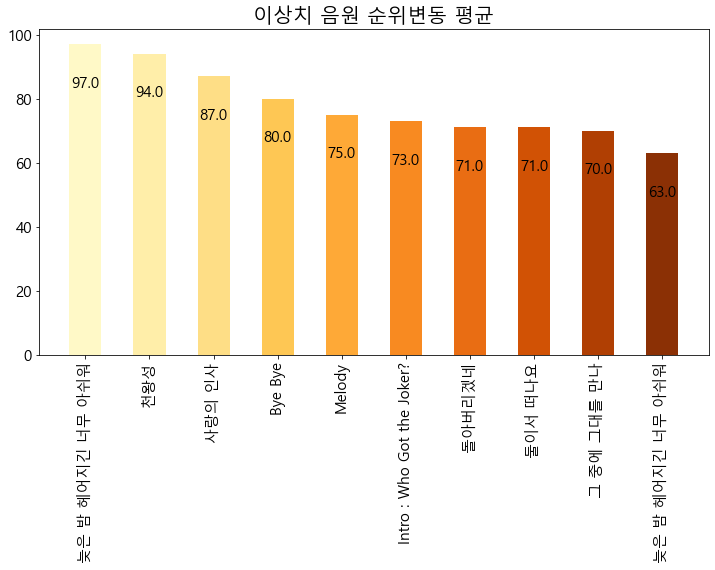

In [156]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrBr', mod_total_outlier_df.shape[0])
x = [i for i,s in enumerate(mod_total_outlier_df['곡'].tolist())]
y = mod_total_outlier_df['순위변동평균(양수)'].tolist()
plt.bar(x, y, color=colors, width=0.5)
plt.title(f'이상치 음원 순위변동 평균', fontdict={'size':20})
for i in range(mod_total_outlier_df.shape[0]):
    plt.text(i, mod_total_outlier_df['순위변동평균(양수)'][i] - mod_total_outlier_df['순위변동평균(양수)'].max()*0.1, round(mod_total_outlier_df['순위변동평균(양수)'][i], 1), verticalalignment='top', horizontalalignment='center', fontsize=15)
plt.xticks(x, mod_total_outlier_df['곡'].tolist(), fontsize=15, rotation=90)
plt.yticks(fontsize=15);
# save_folder4 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}'
file_name4 = f'{start_date}_{end_date}_total_outlier.png'
save_img_total_outlier_path = os.path.join(save_folder4, file_name4)
plt.savefig(save_img_total_outlier_path, bbox_inches='tight')
print(f'{file_name4} 출력 완료.')

## 4-2-1. 소속사별 진입 음원
* 이상치 음원들의 평균 순위

In [32]:
# 음원 사이트
site_list = ['bugs', 'flo', 'genie', 'melon', 'vibe']
outlier_agency_df = pd.DataFrame()
for site_name in site_list:
    # 실시간 순위 파일 폴더로 이동
    # code_path = 'c:/data/Wantreez/Crawling/music'
    live_folder2 = f'crawled_data/mod_{site_name}'
    live_path2 = os.path.join(code_path, live_folder2)
    file_list = os.listdir(live_path2)

    df = pd.DataFrame()
    for one in file_list:
        # live_path2 = 'c:/data/Wantreez/Crawling/music/crawled_data/mod_{site_name}'
        one_path2 = os.path.join(live_path2, one)
        temp = pd.read_excel(one_path2)
        df = pd.concat([df, temp], ignore_index=True)
    df['날짜'] = df['날짜'].astype(str)
    sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
 
    # 이상치 음원의 기획사 소속 가수 평균
    for agency in mod_total_outlier_df['소속사'].unique():
        temp = sliced_df[sliced_df['소속사'] == agency].reset_index(drop=True)
        outlier_agency_df = pd.concat([outlier_agency_df, temp], ignore_index=True)

In [33]:
outlier_agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     1181 non-null   object
 1   날짜      1181 non-null   object
 2   순위      1181 non-null   int64 
 3   곡       1181 non-null   object
 4   가수      1181 non-null   object
 5   앨범      1181 non-null   object
 6   소속사     1181 non-null   object
 7   소속사_분류  1181 non-null   object
dtypes: int64(1), object(7)
memory usage: 73.9+ KB


In [34]:
mean_outlier_agency_df = outlier_agency_df.groupby(['소속사', '사이트', '곡', '가수']).agg({'순위':'mean'}).reset_index()

In [35]:
mean_outlier_agency_df = mean_outlier_agency_df.rename(columns={'순위':'순위평균'})
mean_outlier_agency_df = mean_outlier_agency_df[['소속사', '곡', '가수', '순위평균', '사이트']]
mean_outlier_agency_df['순위평균'] = round(mean_outlier_agency_df['순위평균'], 1)

In [36]:
mean_outlier_agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소속사     194 non-null    object 
 1   곡       194 non-null    object 
 2   가수      194 non-null    object 
 3   순위평균    194 non-null    float64
 4   사이트     194 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


In [37]:
mean_outlier_agency_df.head()

,소속사,곡,가수,순위평균,사이트
0,MBC,YOU AND I,WSG워너비 조별경연 (대청봉),13.4,Bugs
1,MBC,듣고 싶을까,MSG워너비(M.O.M),43.9,Bugs
2,MBC,사랑의 인사,WSG워너비 조별경연 (비로봉),13.0,Bugs
3,MBC,행복한 나를,WSG워너비 조별경연 (신선봉),42.0,Bugs
4,MBC,YOU AND I,WSG워너비 조별경연 (대청봉),62.3,Flo


In [38]:
# 이상치 음원 소속사 음원 순위 평균 df 출력
# save_folder4 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}'
file_name5 = f'{start_date}_{end_date}_mean_outlier_agency.xlsx'
save_mean_outlier_agency_path = os.path.join(save_folder4, file_name5)
mean_outlier_agency_df.to_excel(save_mean_outlier_agency_path, index=False)
print(f'{file_name5} 출력')

2022-05-16_2022-05-22_mean_outlier_agency.xlsx 출력


## 4-1-1. 기획사별 음원차트 진입 요약
* 이상치 음원 기획사별 분석

In [39]:
agency_music_df = mean_outlier_agency_df.drop_duplicates(['소속사', '곡', '가수']).reset_index(drop=True)

In [40]:
agency_music_df.head()

,소속사,곡,가수,순위평균,사이트
0,MBC,YOU AND I,WSG워너비 조별경연 (대청봉),13.4,Bugs
1,MBC,듣고 싶을까,MSG워너비(M.O.M),43.9,Bugs
2,MBC,사랑의 인사,WSG워너비 조별경연 (비로봉),13.0,Bugs
3,MBC,행복한 나를,WSG워너비 조별경연 (신선봉),42.0,Bugs
4,MBC,바라만 본다,MSG워너비(M.O.M),43.9,Flo


In [41]:
agency_music_df.groupby(['소속사']).agg('size').reset_index()

,소속사,0
0,MBC,8
1,P NATION,18
2,SONY MUSIC,3
3,WAKE ONE,6
4,WM,5
5,YG,11
6,neuron music,4
7,꿈의엔진,3
8,물고기뮤직,15
9,빅히트,8


In [42]:
mean_outlier_agency_df.groupby(['소속사']).agg('size').reset_index()

,소속사,0
0,MBC,17
1,P NATION,32
2,SONY MUSIC,6
3,WAKE ONE,11
4,WM,10
5,YG,18
6,neuron music,9
7,꿈의엔진,9
8,물고기뮤직,52
9,빅히트,24


In [43]:
num_music = mean_outlier_agency_df.groupby(['소속사']).agg('size').reset_index().sort_values(0, ascending=False)
num_music.columns = ['소속사', '음원수량']
num_music

,소속사,음원수량
8,물고기뮤직,52
1,P NATION,32
9,빅히트,24
5,YG,18
0,MBC,17
3,WAKE ONE,11
4,WM,10
6,neuron music,9
7,꿈의엔진,9
2,SONY MUSIC,6


In [44]:
num_music_df = pd.merge(mean_outlier_agency_df, num_music, how='left', on='소속사')
num_music_df.head()

,소속사,곡,가수,순위평균,사이트,음원수량
0,MBC,YOU AND I,WSG워너비 조별경연 (대청봉),13.4,Bugs,17
1,MBC,듣고 싶을까,MSG워너비(M.O.M),43.9,Bugs,17
2,MBC,사랑의 인사,WSG워너비 조별경연 (비로봉),13.0,Bugs,17
3,MBC,행복한 나를,WSG워너비 조별경연 (신선봉),42.0,Bugs,17
4,MBC,YOU AND I,WSG워너비 조별경연 (대청봉),62.3,Flo,17


In [45]:
max_num_music = num_music_df.sort_values(['음원수량', '순위평균'], ascending=False).iloc[0:1, :]
max_num_music

,소속사,곡,가수,순위평균,사이트,음원수량
114,물고기뮤직,별빛 같은 나의 사랑아,임영웅,93.0,Bugs,52


In [46]:
max_rank_music = num_music_df.sort_values('순위평균', ascending=True).iloc[0:1, :]
max_rank_music

,소속사,곡,가수,순위평균,사이트,음원수량
27,P NATION,That That (prod. & feat. SUGA of BTS),싸이 (PSY),1.0,Flo,32


In [47]:
agency_in_chart = pd.concat([max_num_music, max_rank_music], ignore_index=True)
agency_in_chart = agency_in_chart[['소속사', '음원수량', '순위평균', '가수', '곡', '사이트']]
agency_in_chart

,소속사,음원수량,순위평균,가수,곡,사이트
0,물고기뮤직,52,93.0,임영웅,별빛 같은 나의 사랑아,Bugs
1,P NATION,32,1.0,싸이 (PSY),That That (prod. & feat. SUGA of BTS),Flo


In [48]:
# 이상치 음원 소속사별 음원차트 진입 요약 df 출력
# save_folder4 = 'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}'
file_name6 = f'{start_date}_{end_date}_agency_in_chart.xlsx'
save_agency_in_chart_path = os.path.join(save_folder4, file_name6)
agency_in_chart.to_excel(save_agency_in_chart_path, index=False)
print(f'{file_name6} 출력')

2022-05-16_2022-05-22_agency_in_chart.xlsx 출력


## 4-1-2. 기획사 소셜미디어 관심도 요약

### 네이버 데이터 랩

In [49]:
# 파일 저장 폴더 생성
naver_datalab_path = f'crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab'
des2 = os.path.join(code_path, naver_datalab_path)
os.makedirs(des2, exist_ok=True)
des2

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22/naver_datalab'

In [59]:
ca.install(True)
driver = webdriver.Chrome()

#### 다운 파일 경로, 이름 설정

In [60]:
# 다운 파일 경로, 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'

In [61]:
# 네이버 데이터 랩 검색
for i in range(agency_in_chart.shape[0]):
    # 네이버 데이터 랩 접속
    url = 'https://datalab.naver.com/keyword/trendSearch.naver'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = agency_in_chart['소속사'][i]
    search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 1개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 주간 클릭
    week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
    time.sleep( random.uniform(0.5, 1) )
    week_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div/ul/li[2]').click()
    time.sleep( random.uniform(0.5, 1) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)

    # 다운 버튼 클릭
    down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
    time.sleep( random.uniform(1, 1.5) )

    # 다운 파일 이름 변경
    new_down_xlsx = f'{word}.xlsx'
    os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

    # 파일 이동
    new_down_path = os.path.join(des2, new_down_xlsx)
    shutil.move(down_folder + new_down_xlsx, new_down_path)
    print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1516858410.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1516858410.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1516858410.py:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
C:\Users\kbj

물고기뮤직.xlsx 완료.
P NATION.xlsx 완료.


In [62]:
driver.quit()

### 그래프 x축 설정

In [63]:
xticks_names = ['5월2주차', '5월3주차']

In [64]:
des2

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22/naver_datalab'

소속사_소셜관심도.png 저장 완료.


C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


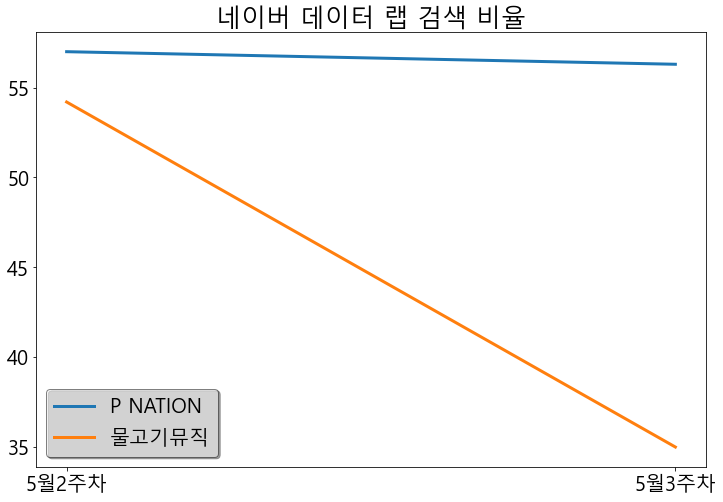

In [65]:
# 그래프 생성
file_list = os.listdir(des2)
plt.figure( figsize=(12,8) )
for one in file_list:
    title = one.split('.')[0]
    if title in agency_in_chart['소속사'].values:
        # print(title)
        one_path3 = os.path.join(des2, one)
        temp = pd.read_excel(one_path3)
        temp = temp.reset_index(drop=True)
        temp = temp.iloc[6:, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']

        date_list = pd.date_range(end=start_date, periods=2, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(float)
        week_temp['검색비율'] = round(week_temp['검색비율'], 1)
        
        x = xticks_names
        y = week_temp['검색비율']

        plt.plot(x, y, linewidth=3, label=title)

plt.title(f"네이버 데이터 랩 검색 비율", fontsize=25)
plt.xticks(xticks_names ,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(framealpha=0.5, fontsize=20, frameon=True, edgecolor='k', shadow=True);
save_img_path = os.path.join(des2, '소속사_소셜관심도.png')
plt.savefig(save_img_path)
print('소속사_소셜관심도.png 저장 완료.')

### 카카오 트랜드

#### 다운 파일 경로, 이름 설정

In [66]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xls = 'datatrend.xls'

In [67]:
# 파일 저장 폴더 생성
kakao_trend_path = f'crawled_data/outlier_data/{start_date}_{end_date}/kakao_trend'
des3 = os.path.join(code_path, kakao_trend_path)
os.makedirs(des3, exist_ok=True)
des3

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22/kakao_trend'

In [68]:
ca.install(True)
driver = webdriver.Chrome()

In [69]:
# 카카오 트랜드 검색
for i in range(agency_in_chart.shape[0]):
    # 카카오 트랜드 접속
    url = 'https://datatrend.kakao.com/'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = agency_in_chart['소속사'][i]
    search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 1개월 picker 클릭
    driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
    time.sleep( random.uniform(1, 1.5) )

    # 기준 주간 클릭
    driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/ul/li[2]/label/span').click()
    time.sleep( random.uniform(1, 1.5) )


    # 검색 버튼 클릭
    driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[4]/button[2]').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)
    
    # 다운 버튼 클릭
    driver.find_element_by_xpath('/html/body/div/div/header/div/div/a[2]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 다운 파일 이름 변경
    new_down_xls = f'{word}.xls'
    os.rename(down_folder + down_xls, down_folder + new_down_xls)

    # 파일 이동
    new_down_path = os.path.join(des3, new_down_xls)
    shutil.move(down_folder + new_down_xls, new_down_path)
    print(f'{new_down_xls} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1280609874.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1280609874.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1280609874.py:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_20092/1280609874.py:24: DeprecationWarning: find_element_by_xpath is d

물고기뮤직.xls 완료.
P NATION.xls 완료.


In [70]:
des3

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22/kakao_trend'

소속사_소셜관심도.png 저장 완료.


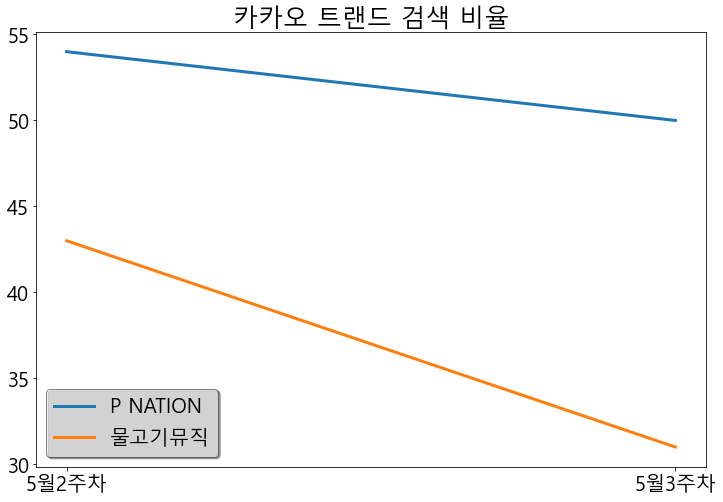

In [80]:
# 그래프 생성
file_list = os.listdir(des3)
plt.figure( figsize=(12,8) )
for one in file_list:
    title = one.split('.')[0]
    if title in agency_in_chart['소속사'].values:
        # print(title)
        one_path4 = os.path.join(des3, one)
        temp = pd.read_excel(one_path4).reset_index(drop=True)
        temp = temp.iloc[7:38, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']
        temp['날짜'] = temp['날짜'].astype(str)
        temp['날짜'] = temp['날짜'].apply([lambda x: x.split(' ')[0]])
        date_list = pd.date_range(end=start_date, periods=2, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
            
        x = xticks_names
        y = week_temp['검색비율']
        plt.plot(x, y, linewidth=3, label=title)

plt.title(f"카카오 트랜드 검색 비율", fontsize=25)
plt.xticks(xticks_names ,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(framealpha=0.5, fontsize=20, frameon=True, edgecolor='k', shadow=True);
save_img_path = os.path.join(des3, '소속사_소셜관심도.png')
plt.savefig(save_img_path)
print('소속사_소셜관심도.png 저장 완료.')

# 코드 마지막